# Comparison of QuPath and DeepCell segmentation

## Dependencies
We load all the necessary libraries used for the segmentation, visualisation and quantification in this notebook.

In [68]:
# Libraries required to import the csv file from the associated github repository
import pandas as pd
import requests
import io
import glob
import re
import os

import matplotlib.pyplot as plt
from tqdm import tqdm
# import plotly.graph_objects as go
# import pickle
# from shapely.geometry.collection import GeometryCollection
# from shapely.ops import split

# import muspan as ms
import numpy as np
import seaborn as sns # Make things look prettier
# sns.set(font_scale=1) # Make font size bigger
sns.set_style('white')# Make image style nice


## 1. Define data location and setup directory structure

### 1.1 Set data directory

The first step is to set the *data/base directory* `base_dir` that contains a folder called `segmentation` folder with `cell_table` subfolders for the qupath and deepcell segmentation results. The content of the *base* directory would look something like the example below. We will also save the results and all the pipeline outputs in this folder as well.

```
└── segmentation
    ├── cell_table
    ├── cell_table_no_qc
    └── cell_table_qupath
    
```

In order to define the *data/base directory* we have two options:
* set `set_base_dir_method="Manual"` and manually define the data/base directory below via `data_dir=`
* set `set_base_dir_method="Relative"` which assume that this notebook is saved in a `notebook` folder alongside the `ome_tiff` in the same parent directory

The last option `Relative` ensures greatest reproducibility and transferability as the notebook is saved alongside the data and all path are defined relative to it.

**NOTE: In `WSL` the `C:` drive, `D:` drive, etc are mounted and located at `/mnt/c`, `/mnt/d`, etc, respectively.**

In [9]:
set_base_dir_method = "Relative"

In [10]:
if set_base_dir_method == "Relative":
    notebook_dir = %pwd
    data_dir = os.path.dirname(notebook_dir)
elif set_base_dir_method == "Manual":
    data_dir = "/path/to/data/directory"

In [11]:
# set the base directory
base_dir = data_dir

### 1.2 Setup intermediate and results paths

Next, we create all the required output and results directories such that we have the following folder structure in the `base directory`:

```
├── analysis
└── segmentation
    ├── cell_table
    ├── cell_table_no_qc
    └── cell_table_qupath
    
```

Here, we set all the directory names to be created.

In [12]:
results_dir = os.path.join(base_dir, "analysis")

Then, we check if the directories exist and if not create them.

In [13]:
for directory in [results_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

## 2. Load data

In [34]:
df = pd.read_csv(os.path.join(results_dir,"combined_data_export.csv"))
df.rename(columns={'adj_x': 'x', 'adj_y': 'y'}, inplace=True)
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

/tmp/ipykernel_816260/2656887012.py:1: DtypeWarning: Columns (3,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(results_dir,"combined_data_export.csv"))


In [35]:
markers_list = list(set(list(df)).difference(['Unnamed: 0', 'source', 'fov', 'ObjectNumber', 'area', 'eccentricity', 'sample_id', 'x', 'y', 'patient_id']))

## 3. Comparison of QuPath vs Deepcell segmentation

### 3.1 Create pointclouds

#### Create mixed point clouds

Overlay the points obtained with both segmentation methods

In [ ]:
# points = np.array([df['x'], df['y']]).T

# pc = ms.pointcloud.generatePointCloud(name= "Comparison segmentation", points=points)
# ms.visualise.visualise(pc)
# print(pc.nPoints)

#### Create unique point clouds

Create pointclouds with the cells from only one method

In [ ]:
# subset_QP = df [df.source !== "QuPath"]

In [ ]:
# points = np.array([subset_QP['x'], subset_QP['y']]).T
# pc_QP_only  = ms.pointcloud.generatePointCloud(name= "QuPath only ", points=points)

In [ ]:
# subset_DC = df [df.source !== "Deepcell"]

In [ ]:
# points = np.array([subset_DC['x'], subset_DC['y']]).T

# pc_DC_only  = ms.pointcloud.generatePointCloud(name= "DeepCell only ", points=points)

#### Add labels

In [ ]:
# pc.addLabels(labelName= "source",labelType='categorical',labels=df["source"].values)

In [ ]:
# ms.visualise.visualise(pc, markerSize=3, labelForVisualisation= "source",showBoundary=False)

### 3.2 Compare segmentation outputs

#### Compare number of cells

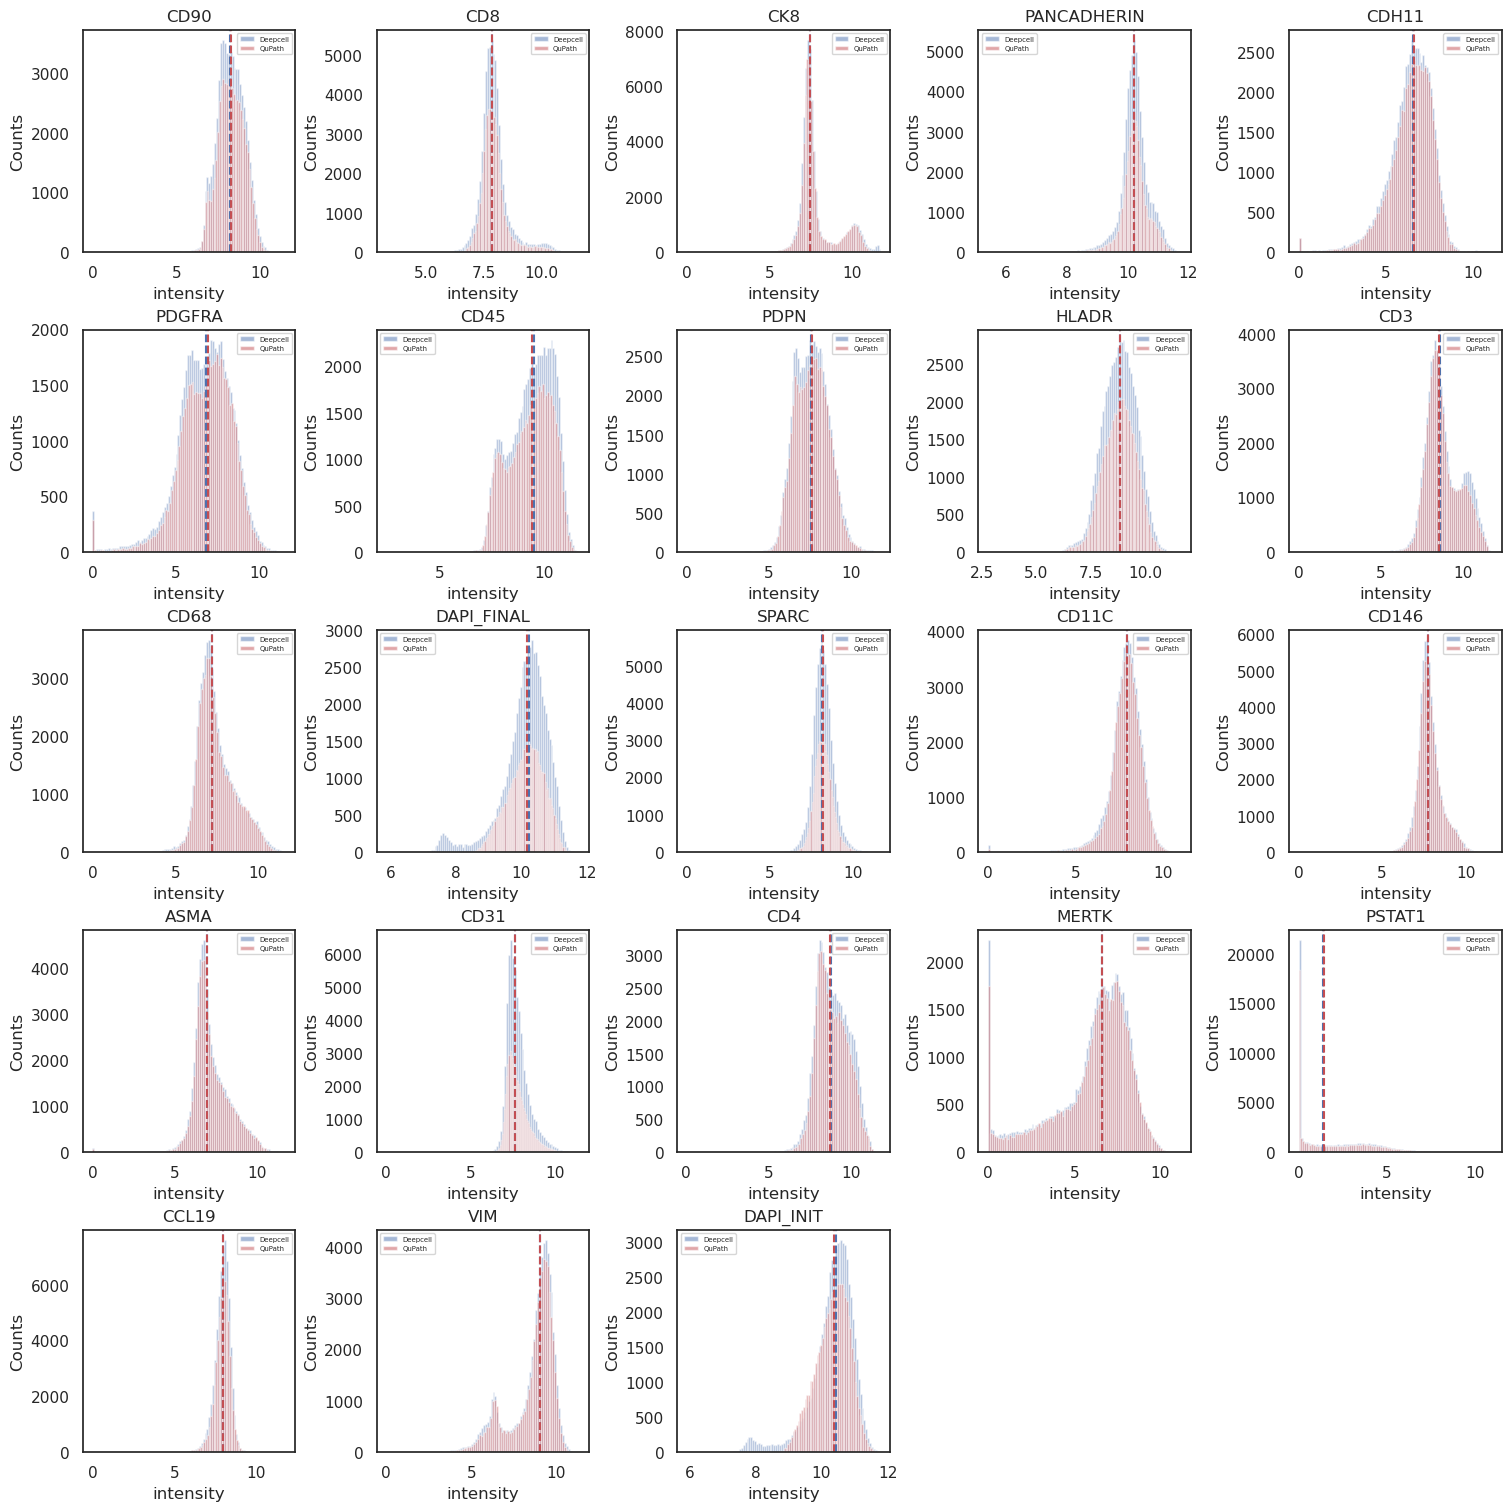

In [78]:
fig= plt.figure(figsize=(15, 15),layout='constrained')

# plt.subplots(ncols=5, nrows=5,)


for (idx, marker) in enumerate(markers_list):

    # Filter dataframe based on 'source' column values
    deepcell_data = df[df['source'] == 'Deepcell']
    qupath_data = df[df['source'] == 'QuPath']

    # Set up the figure and axes
    # fig, ax = plt.subplots()

    ax = fig.add_subplot(5, 5, idx+1)

    # Plot histogram for Deepcell
    ax.hist(deepcell_data[marker], bins=100, alpha=0.5, label='Deepcell', color= 'b')

    # Plot histogram for QuPath
    ax.hist(qupath_data[marker], bins=100, alpha=0.5, label='QuPath', color= 'r')

    # Add labels and title
    ax.set_xlabel("intensity" )
    ax.set_ylabel('Counts')
    ax.set_title(marker)

    # Add legend
    ax.legend()
    plt.legend(fontsize=5)  # Adjust the font size as needed

    median_qupath = np.median(qupath_data[marker])
    median_deepcell = np.median(deepcell_data[marker])

    plt.axvline(x=median_deepcell, color='b', linestyle='--')  # 'r' is for red color, '--' is for dashed line
    plt.axvline(x=median_qupath, color='r', linestyle='--')  # 'r' is for red color, '--' is for dashed line

# # Show the plot
plt.show()

#### Compare in ROI

In [ ]:
# pc_cropped = ms.pointcloud.crop_to_domain(pc, [[2252, 2252+1051], [3022, 3022+817]])

In [ ]:
# pc_cropped_QP = ms.pointcloud.crop_to_domain(pc_QP_only, [[2252, 2252+1051], [3022, 3022+817]])

In [ ]:
# pc_cropped_DC = ms.pointcloud.crop_to_domain(pc_DC_only, [[2252, 2252+1051], [3022, 3022+817]])

In [ ]:
# ms.visualise.visualise(pc_cropped_QP, labelForVisualisation='source', markerSize= 70)

In [ ]:
# ms.visualise.visualise(pc_cropped_DC, labelForVisualisation='source', markerSize= 70)

In [ ]:
# ms.visualise.visualise(pc_cropped, labelForVisualisation='source', markerSize= 70)

In [ ]:
# ms.visualise.visualise(pc, labelForVisualisation='source', markerSize= 0.3)